In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ipywidgets as widgets 
from ipywidgets import interact, interactive_output
from IPython import display as dsp
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/biomass-pyrolysis-data/pyrolysis.csv')

In [3]:
data.drop(columns=["Index"],inplace=True)

In [4]:
# Display the first few rows of the dataset
data.head()

Biomass species      M  Ash      VM     FC      C     H      O  \
0  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11  47.26   
1  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11  47.26   
2  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11  47.26   
3  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11  47.26   
4                       reed   5.89  8.47  72.12  13.52  42.78  5.17  50.51   

      N   PS   FT    HR     FR Solid phase Liquid phase Gas phase  
0  0.75  0.5  550  10.0  100.0          35         44.9      20.1  
1  0.75  0.5  650  10.0  100.0       31.75        41.25        27  
2  0.75  0.5  750  10.0  100.0        30.2         40.6      29.2  
3  0.75  0.5  850  10.0  100.0        28.6        36.36     35.04  
4  1.33  0.5  550  10.0  100.0       32.85        54.38     12.77

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Biomass species  751 non-null    object 
 1   M                632 non-null    float64
 2   Ash              733 non-null    float64
 3   VM               683 non-null    float64
 4   FC               683 non-null    float64
 5   C                748 non-null    float64
 6   H                748 non-null    float64
 7   O                748 non-null    float64
 8   N                721 non-null    float64
 9   PS               650 non-null    object 
 10  FT               751 non-null    int64  
 11  HR               641 non-null    float64
 12  FR               570 non-null    float64
 13  Solid phase      742 non-null    object 
 14  Liquid phase     715 non-null    object 
 15  Gas phase        715 non-null    object 
dtypes: float64(10), int64(1), object(5)
memory usage: 94.0+ KB


In [6]:
# Summary statistics
data.describe()

M        Ash           VM          FC           C           H  \
count  632.000000  733.000000  683.000000  683.000000  748.000000  748.000000   
mean     6.102753    5.825825   73.597965   14.974187   47.758209    6.538048   
std      5.195035    5.352901   10.158146    6.392171    6.371074    1.717418   
min   -100.000000    0.240000    5.820000    0.200000   22.490000    3.000000   
25%      4.900000    1.830000   70.850000   11.300000   44.410000    5.800000   
50%      5.700000    4.700000   74.900000   14.300000   47.280000    6.180000   
75%      7.400000    7.210000   79.580000   18.900000   51.170000    6.740000   
max     22.740000   29.510000   89.800000   39.340000   66.650000   21.200000   

                O           N           FT          HR            FR  
count  748.000000  721.000000   751.000000  641.000000    570.000000  
mean    43.375374    2.597795   524.087883   39.194228    571.440351  
std      7.780077    3.251056   130.299656   70.152123   1748.986519  
min     24.900000    0.000000   300.000000    0.000000      0.000000  
25%     39.100000    0.740000   450.000000   10.000000     32.650000  
50%     44.700000    1.460000   500.000000   20.000000    100.000000  
75%     48.280000    3.900000   550.000000   40.000000    150.000000  
max     73.680000   22.500000  1250.000000  700.000000  10000.000000

In [7]:
# Information about data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Biomass species  751 non-null    object 
 1   M                632 non-null    float64
 2   Ash              733 non-null    float64
 3   VM               683 non-null    float64
 4   FC               683 non-null    float64
 5   C                748 non-null    float64
 6   H                748 non-null    float64
 7   O                748 non-null    float64
 8   N                721 non-null    float64
 9   PS               650 non-null    object 
 10  FT               751 non-null    int64  
 11  HR               641 non-null    float64
 12  FR               570 non-null    float64
 13  Solid phase      742 non-null    object 
 14  Liquid phase     715 non-null    object 
 15  Gas phase        715 non-null    object 
dtypes: float64(10), int64(1), object(5)
memory usage: 94.0+ KB


In [8]:
data.shape

(751, 16)

In [9]:
# Check for % missing values
((1 - (751 - data.isnull().sum()) / 751) * 100).round(2)

Biomass species     0.00
M                  15.85
Ash                 2.40
VM                  9.05
FC                  9.05
C                   0.40
H                   0.40
O                   0.40
N                   3.99
PS                 13.45
FT                  0.00
HR                 14.65
FR                 24.10
Solid phase         1.20
Liquid phase        4.79
Gas phase           4.79
dtype: float64

In [10]:
data["PS"].unique()

array(['0.5', '0.55', '0.3', '0.1', '0.65', '0.4', nan, '0.43', '0.32',
       '0.75', '0.5-0.6', '0.25', '0.38', '0.8', '1.35', '0.83', '1.25',
       '11.25', '0.21', '0.2', '0.33', '0.11', '0.42', '0.46', '0.22',
       '0.24', '0.18', '0.19', '0.31', '2', '1.5', '1', '4', '7', '1.2',
       '0.6', '1.6', '0.7', '0.9', '3.2', '0.85', '0.45', '1.13', '0.23',
       '0.53', '0.73', '1.03', '0.63', '0.93', '175', '10', '2.6', '3.6',
       '150', '1.05', '0.26', '0.36', '1.33', '1.4', '2.5', '3.5', '1.44',
       '0.34', '0.51', '0.35'], dtype=object)

In [11]:
data["PS"] =data["PS"].replace({'0.5-0.6':'0.55'}).astype(float)

In [12]:
data["Solid phase"]=data["Solid phase"].str.replace(' ', '', regex=True).astype(float)

In [13]:
data["Liquid phase"] = data["Liquid phase"].str.replace(' ', '', regex=True).astype(float)
data["Gas phase"] = data["Gas phase"].str.replace(' ', '', regex=True).astype(float)

In [14]:
biomass_species = data['Biomass species'].values

In [15]:
# Group by 'Biomass species' and fill missing values with the mean of the group
data = data.groupby('Biomass species').transform(lambda x: x.fillna(x.mean()))

In [16]:
data['Biomass species'] = biomass_species

In [17]:
# Summary statistics
data.describe()

M        Ash           VM          FC           C           H  \
count  660.000000  733.000000  706.000000  706.000000  751.000000  751.000000   
mean     5.525927    5.825825   73.679476   14.834943   47.751868    6.533881   
std      6.205514    5.352901   10.000955    6.332725    6.359108    1.715244   
min   -100.000000    0.240000    5.820000    0.200000   22.490000    3.000000   
25%      4.900000    1.830000   70.850000   11.300000   44.410000    5.800000   
50%      5.700000    4.700000   75.000000   14.300000   47.280000    6.180000   
75%      7.360000    7.210000   79.287500   18.860000   51.170000    6.740000   
max     22.740000   29.510000   89.800000   39.340000   66.650000   21.200000   

                O           N          PS           FT          HR  \
count  751.000000  731.000000  682.000000   751.000000  657.000000   
mean    43.388336    2.587018    4.847185   524.087883   38.607773   
std      7.767202    3.230010   23.538191   130.299656   69.425837   
min     24.900000    0.000000    0.100000   300.000000    0.000000   
25%     39.100000    0.750000    0.500000   450.000000   10.000000   
50%     44.700000    1.530000    0.650000   500.000000   20.000000   
75%     48.280000    3.900000    1.200000   550.000000   37.368421   
max     73.680000   22.500000  175.000000  1250.000000  700.000000   

                 FR  Solid phase  Liquid phase   Gas phase  
count    652.000000   742.000000    722.000000  722.000000  
mean     512.687601    29.699987     39.020473   27.613550  
std     1642.864090     8.673357     12.206159    9.311466  
min        0.000000     4.810000      0.840000    5.980000  
25%       30.200000    24.485000     30.342500   21.160000  
50%      100.000000    28.645000     39.905000   26.855000  
75%      105.000000    34.117500     47.640000   33.335000  
max    10000.000000    67.800000     68.190000   61.290000

In [18]:
data['Biomass species'].describe()

count          751
unique          98
top       rapeseed
freq            42
Name: Biomass species, dtype: object

In [19]:
# List of numerical features
numerical_features = [col for col in data.columns if data[col].dtype != "O"]
numerical_features

['M',
 'Ash ',
 'VM',
 'FC',
 'C',
 'H',
 'O',
 'N',
 'PS',
 'FT',
 'HR',
 'FR',
 'Solid phase',
 'Liquid phase',
 'Gas phase']

In [20]:
categorical_features = [col for col in data.columns if data[col].dtype == "O"]
categorical_features

['Biomass species']

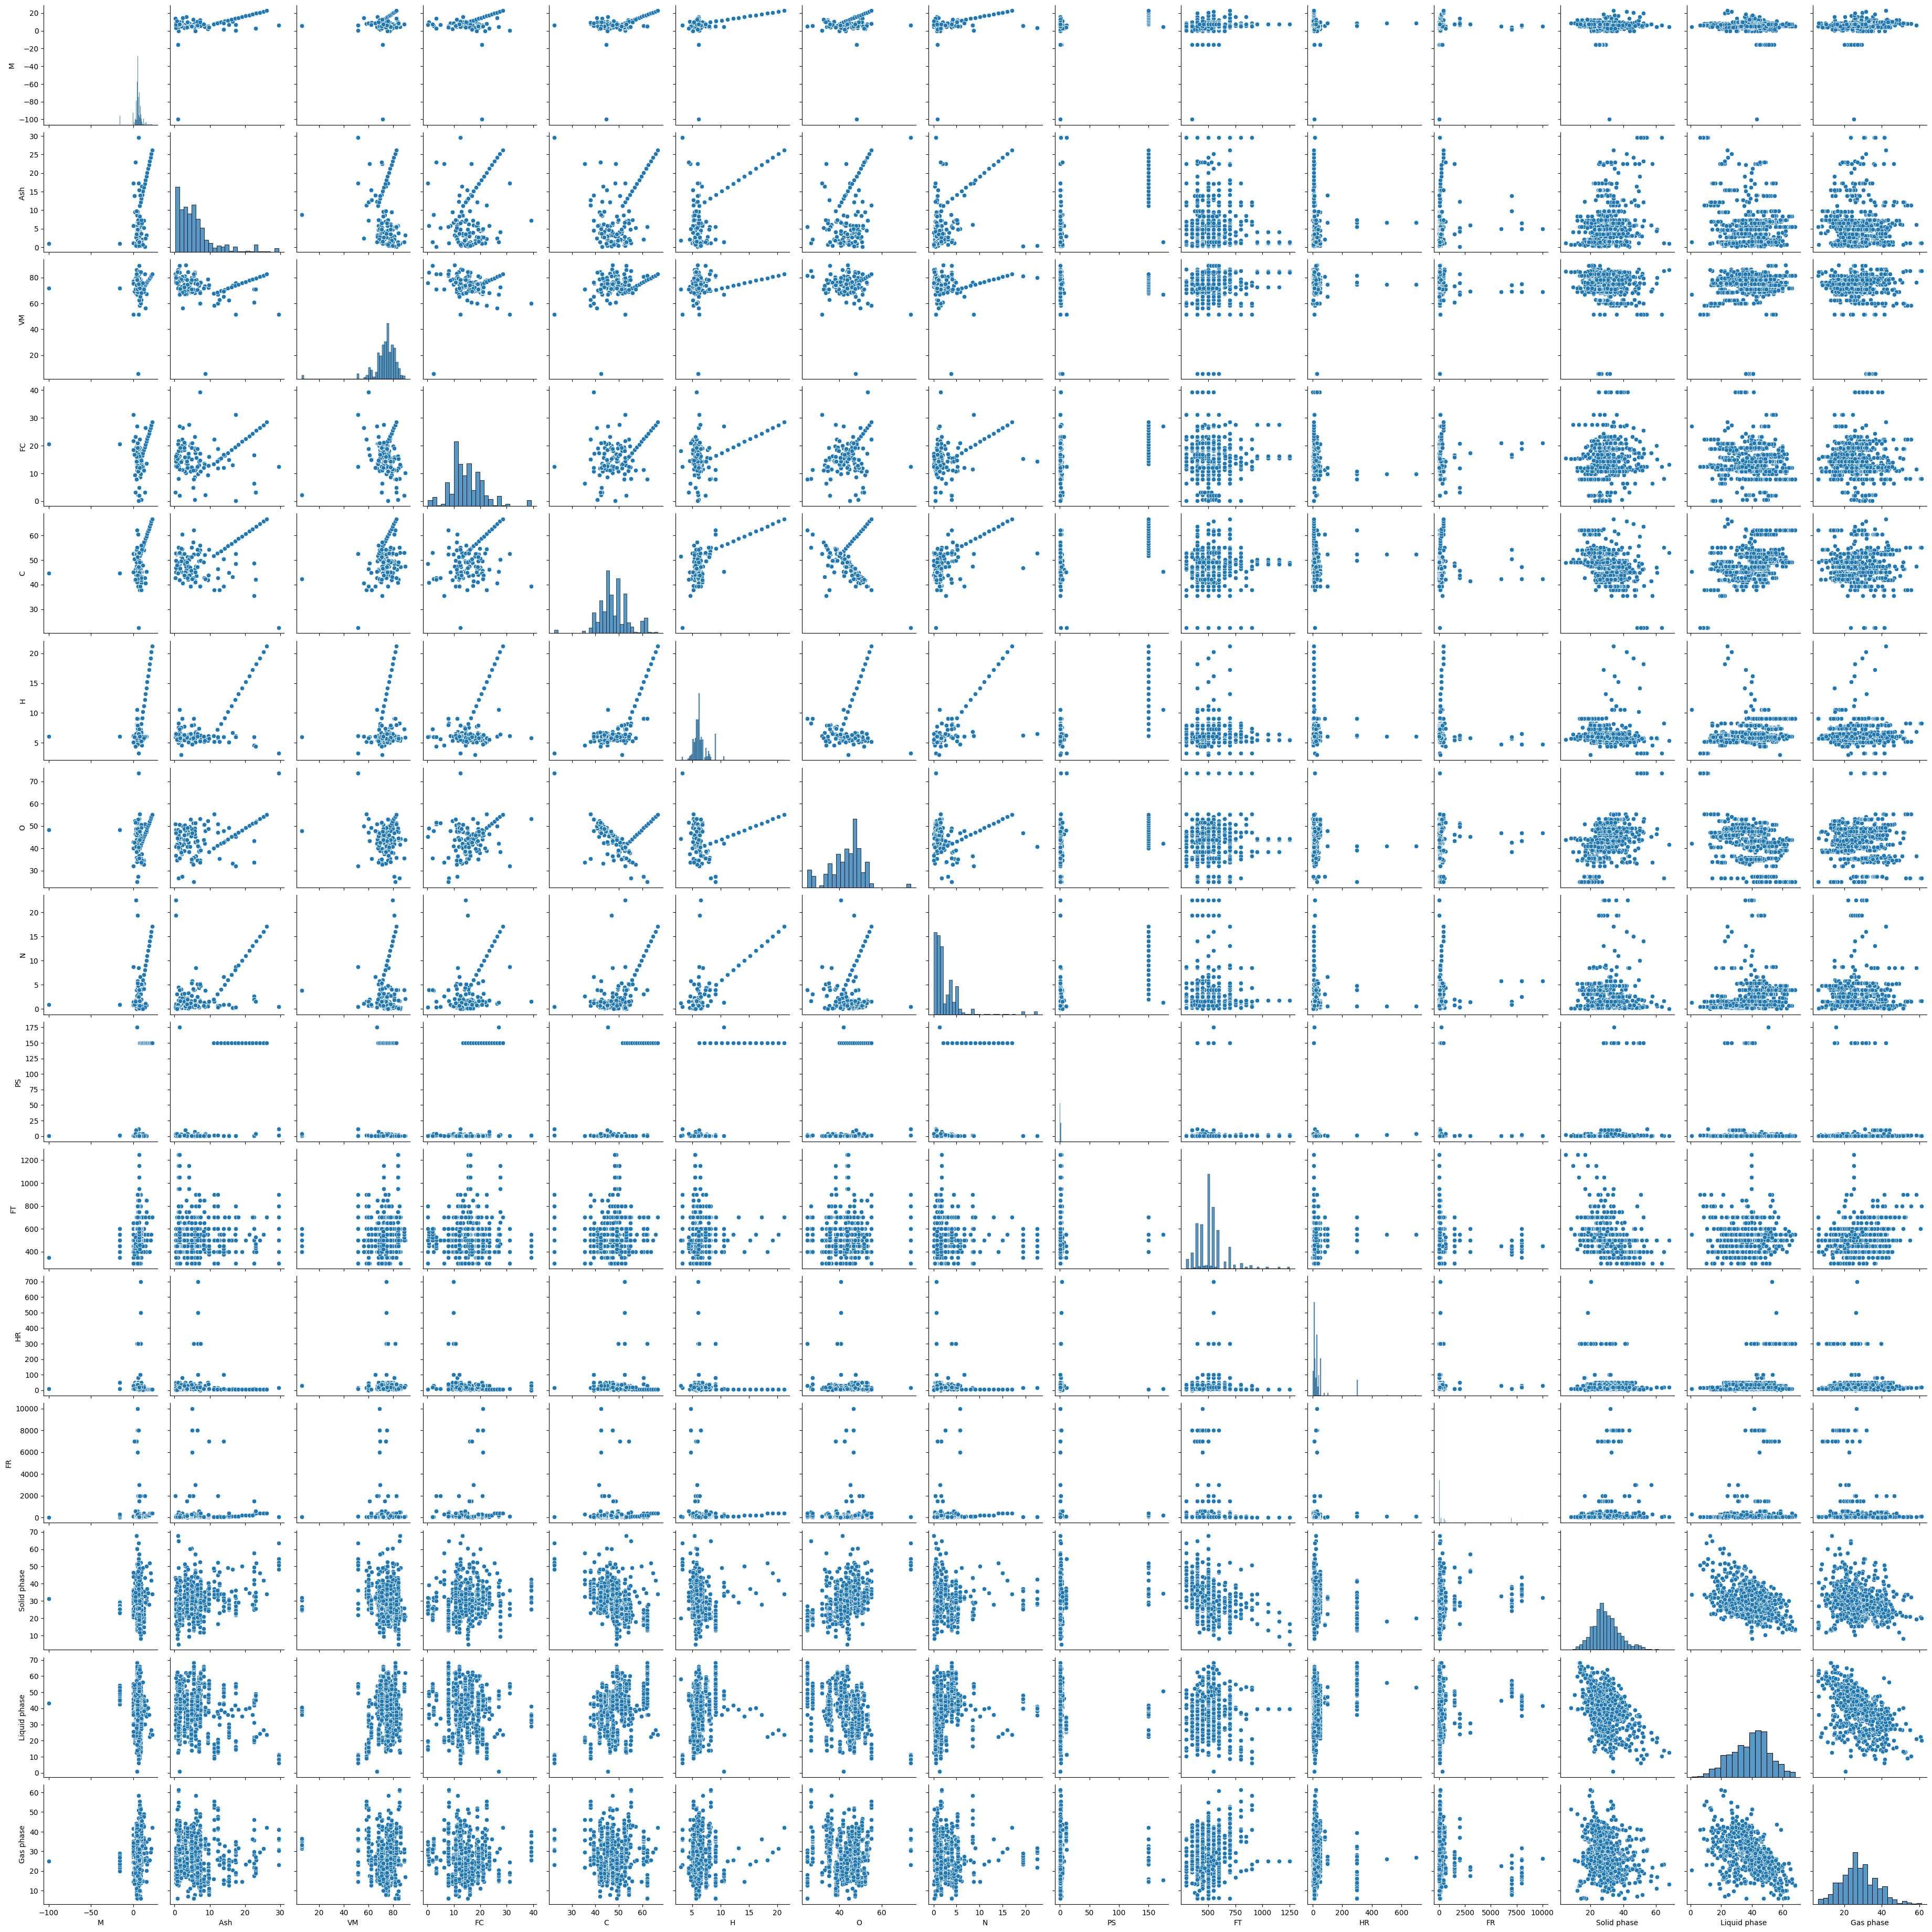

In [21]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data[numerical_features])
plt.show()

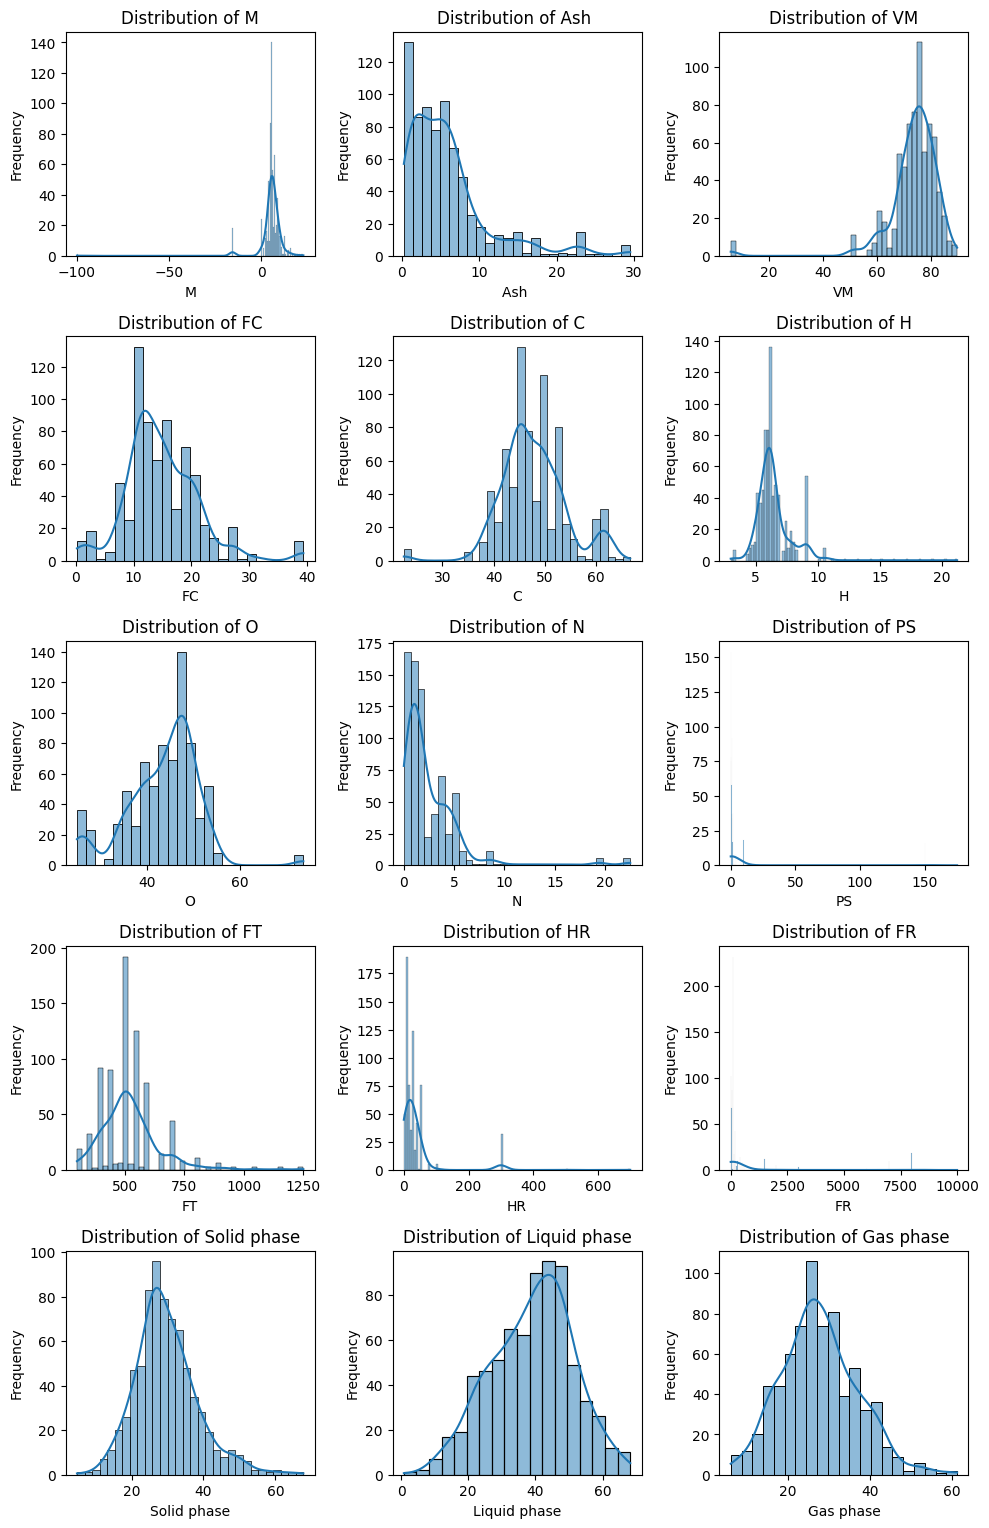

In [22]:

# Number of features
num_features = len(numerical_features)
# Create subplots
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(10, (num_features // 3 + 1) * 3))
axes = axes.flatten()
# Plot each feature in a subplot
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

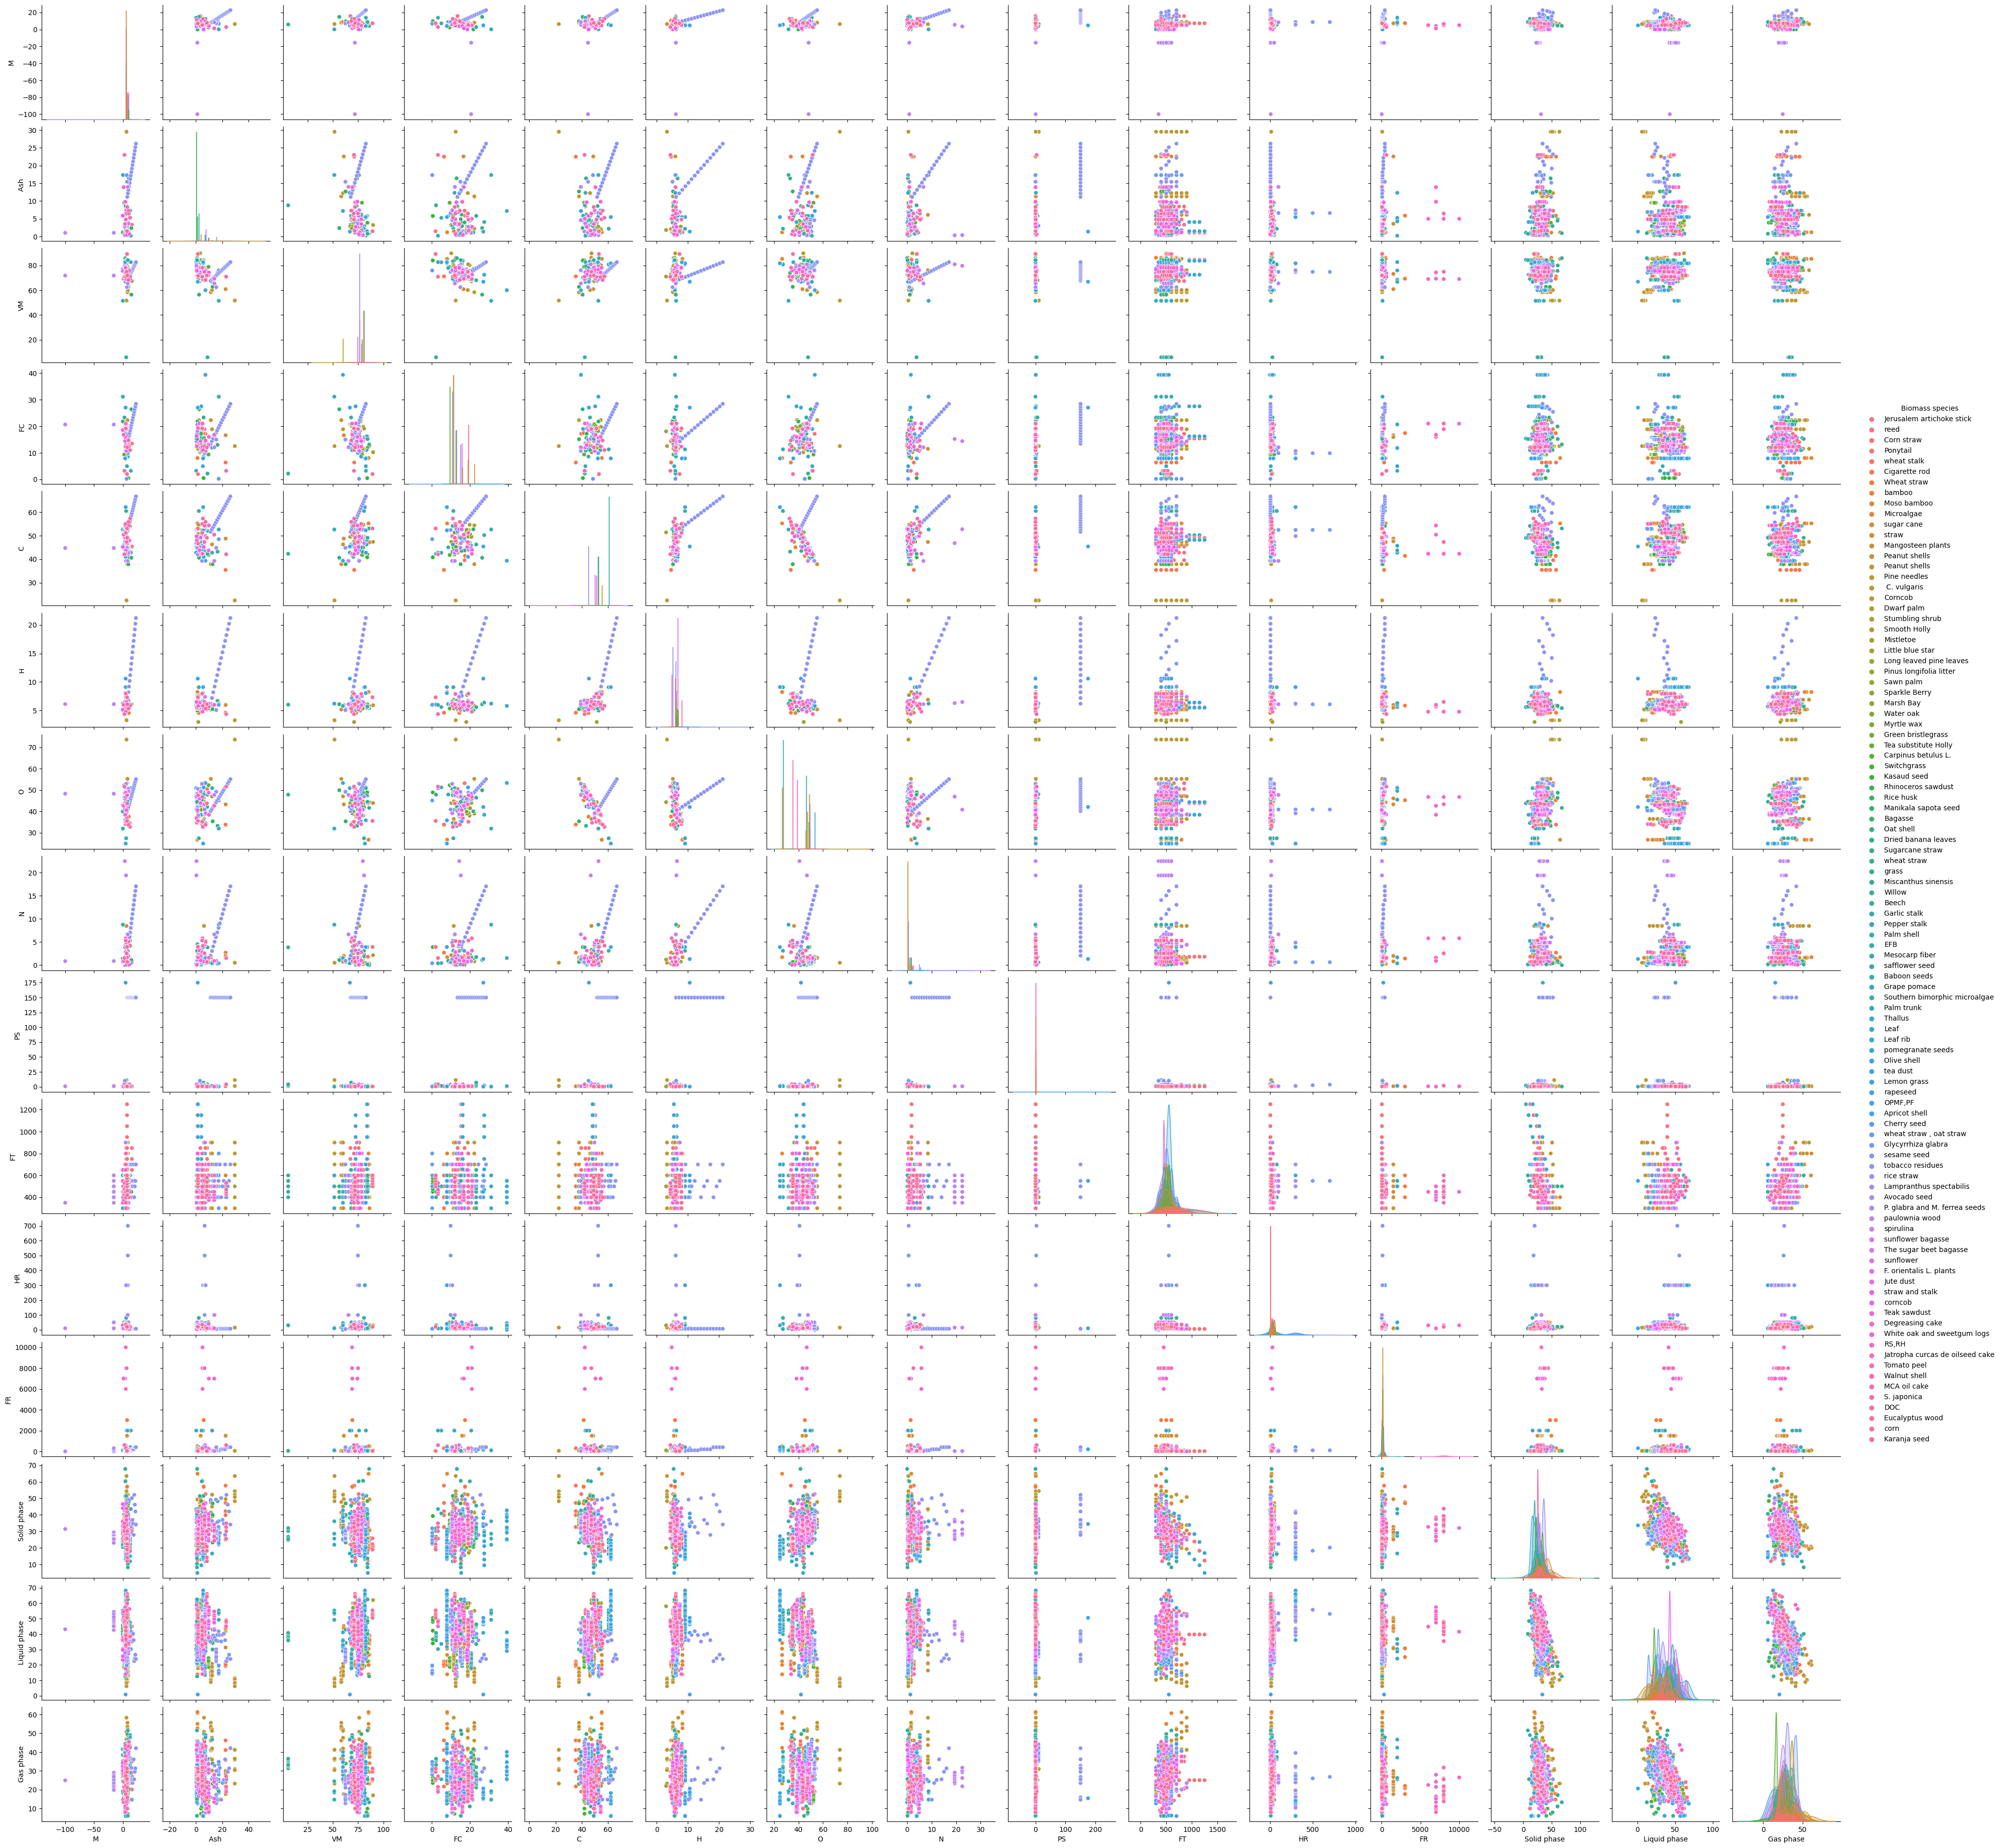

In [23]:
for hue_cat in categorical_features:
    # Pairplot to visualize relationships between numerical features
    sns.pairplot(data[numerical_features+[hue_cat]],hue=hue_cat)
    plt.show()

In [24]:
data["Biomass species"].value_counts()[:50]


Biomass species
rapeseed                           42
Lampranthus spectabilis            31
sugar cane                         23
paulownia wood                     23
safflower seed                     23
sunflower                          20
Corncob                            19
Glycyrrhiza glabra                 18
F. orientalis L. plants            18
sunflower bagasse                  17
spirulina                          16
Grape pomace                       16
tobacco residues                   16
OPMF,PF                            16
rice straw                         14
Eucalyptus wood                    14
The sugar beet bagasse             13
Cherry seed                        13
Corn straw                         13
Jute dust                          13
Rhinoceros sawdust                 13
Carpinus betulus L.                12
Pepper stalk                       12
Baboon seeds                       12
Lemon grass                        12
sesame seed                       

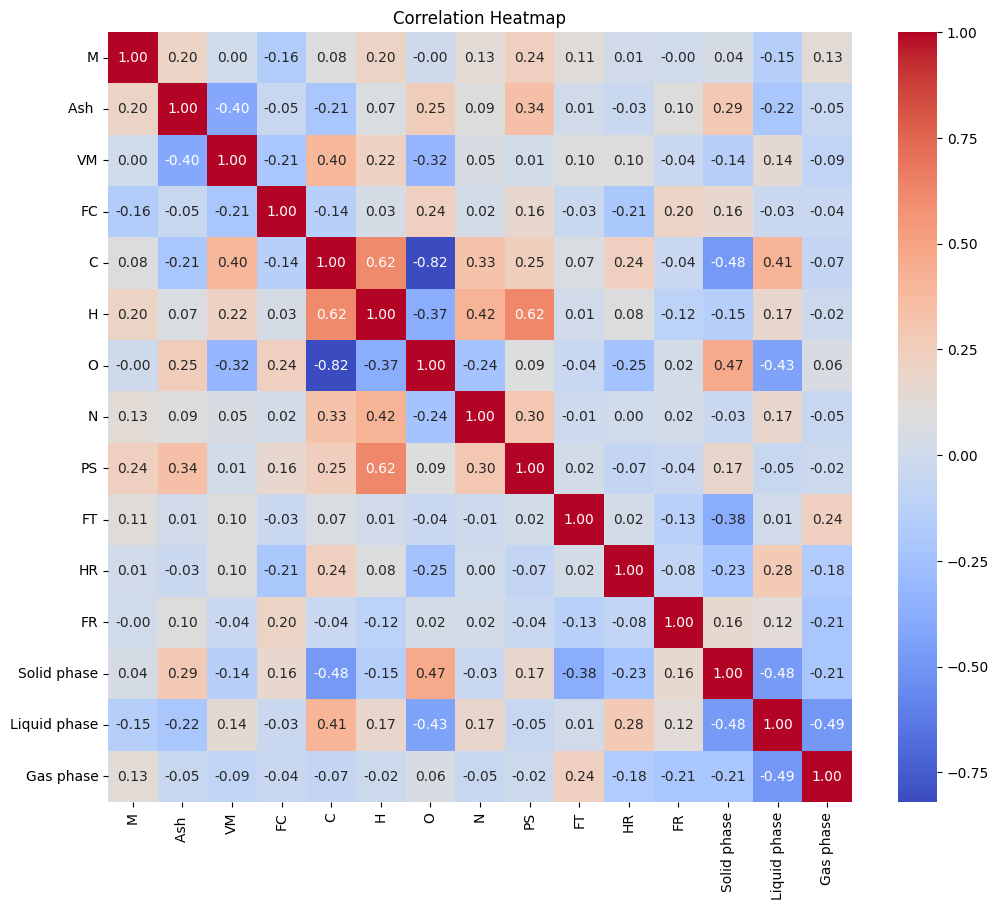

In [33]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# Get the top 50 most frequent values
top_50_species = data['Biomass species'].value_counts().head(25).index

# Filter the DataFrame to include only rows with the top 50 most frequent values
filtered_data = data[data['Biomass species'].isin(top_50_species)]

# Display the result
filtered_data

M  Ash      VM     FC       C      H      O     N    PS   FT  \
8    7.27  7.27  75.56  17.17  39.570  5.250  53.20  1.81  0.55  450   
9    7.27  7.27  75.56  17.17  39.570  5.250  53.20  1.81  0.55  650   
10   7.27  7.27  75.56  17.17  39.570  5.250  53.20  1.81  0.55  850   
26   7.27  3.34  74.59  14.80  46.171  5.495  46.62  1.81  0.55  500   
27   7.27  3.34  74.59  14.80  46.171  5.495  46.62  1.81  0.55  500   
..    ...   ...    ...    ...     ...    ...    ...   ...   ...  ...   
736  5.18  4.80  70.85  19.18  51.170  7.950  35.11  5.32  0.85  450   
737  5.18  4.80  70.85  19.18  51.170  7.950  35.11  5.32  0.85  450   
738  5.18  4.80  70.85  19.18  51.170  7.950  35.11  5.32  0.85  450   
739  5.18  4.80  70.85  19.18  51.170  7.950  35.11  5.32  0.85  450   
740  5.18  4.80  70.85  19.18  51.170  7.950  35.11  5.32  0.85  450   

            HR     FR  Solid phase  Liquid phase  Gas phase  Biomass species  
8     5.833333   20.0        52.57         28.48      18.95       Corn straw  
9     5.833333   20.0        39.26         35.38      25.34       Corn straw  
10    5.833333   20.0        28.82         33.56      37.61       Corn straw  
26    2.500000   20.0        31.99         43.71      24.30       Corn straw  
27    5.000000   20.0        29.80         47.20      23.00       Corn straw  
..         ...    ...          ...           ...        ...              ...  
736  35.000000  100.0        25.10         37.89      31.76  Eucalyptus wood  
737  35.000000  150.0        24.94         39.00      30.89  Eucalyptus wood  
738  35.000000  200.0        24.79         44.43      26.41  Eucalyptus wood  
739  35.000000  250.0        25.17         32.92      31.84  Eucalyptus wood  
740  35.000000  300.0        25.38         36.73      27.36  Eucalyptus wood  

[439 rows x 16 columns]

In [35]:
order = list(filtered_data["Biomass species"].value_counts().index)

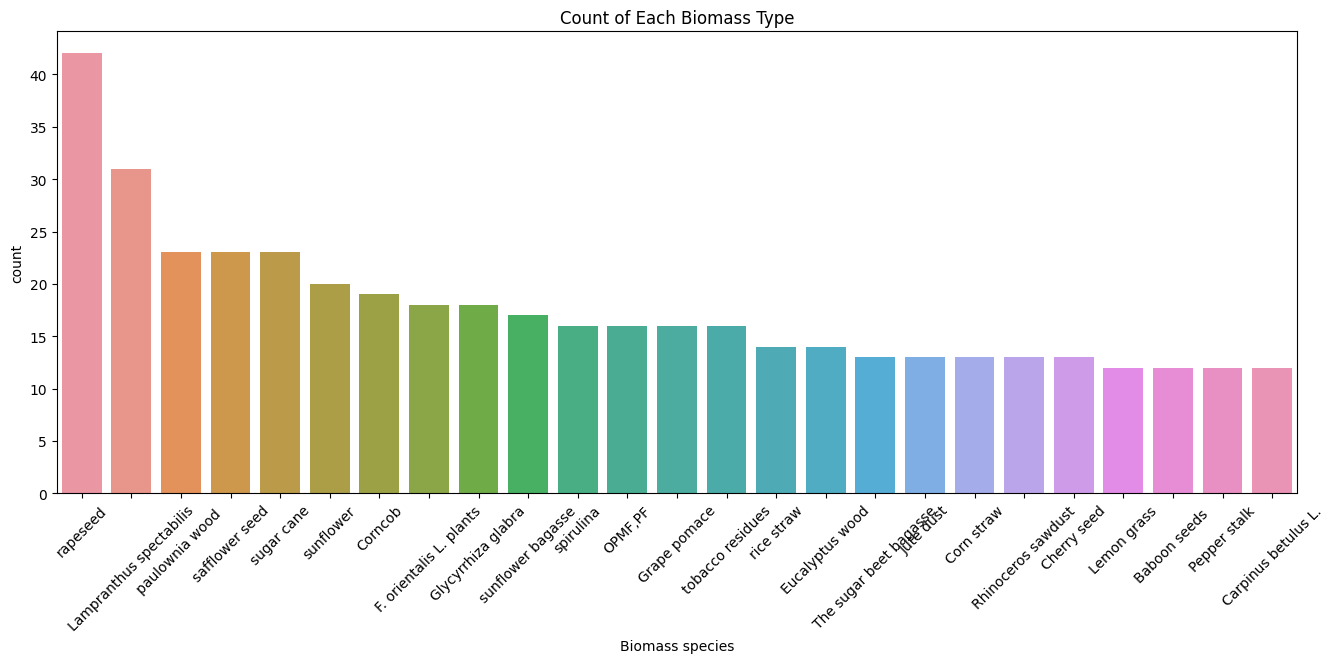

In [36]:
# Count plot for different biomass types, Most common biomass species.
plt.figure(figsize=(16, 6))
sns.countplot(x='Biomass species', data=filtered_data,order=order)
plt.title('Count of Each Biomass Type')
plt.xticks(rotation=45)
plt.show()

In [37]:
filtered_data.head()

M  Ash      VM     FC       C      H      O     N    PS   FT        HR  \
8   7.27  7.27  75.56  17.17  39.570  5.250  53.20  1.81  0.55  450  5.833333   
9   7.27  7.27  75.56  17.17  39.570  5.250  53.20  1.81  0.55  650  5.833333   
10  7.27  7.27  75.56  17.17  39.570  5.250  53.20  1.81  0.55  850  5.833333   
26  7.27  3.34  74.59  14.80  46.171  5.495  46.62  1.81  0.55  500  2.500000   
27  7.27  3.34  74.59  14.80  46.171  5.495  46.62  1.81  0.55  500  5.000000   

      FR  Solid phase  Liquid phase  Gas phase Biomass species  
8   20.0        52.57         28.48      18.95      Corn straw  
9   20.0        39.26         35.38      25.34      Corn straw  
10  20.0        28.82         33.56      37.61      Corn straw  
26  20.0        31.99         43.71      24.30      Corn straw  
27  20.0        29.80         47.20      23.00      Corn straw

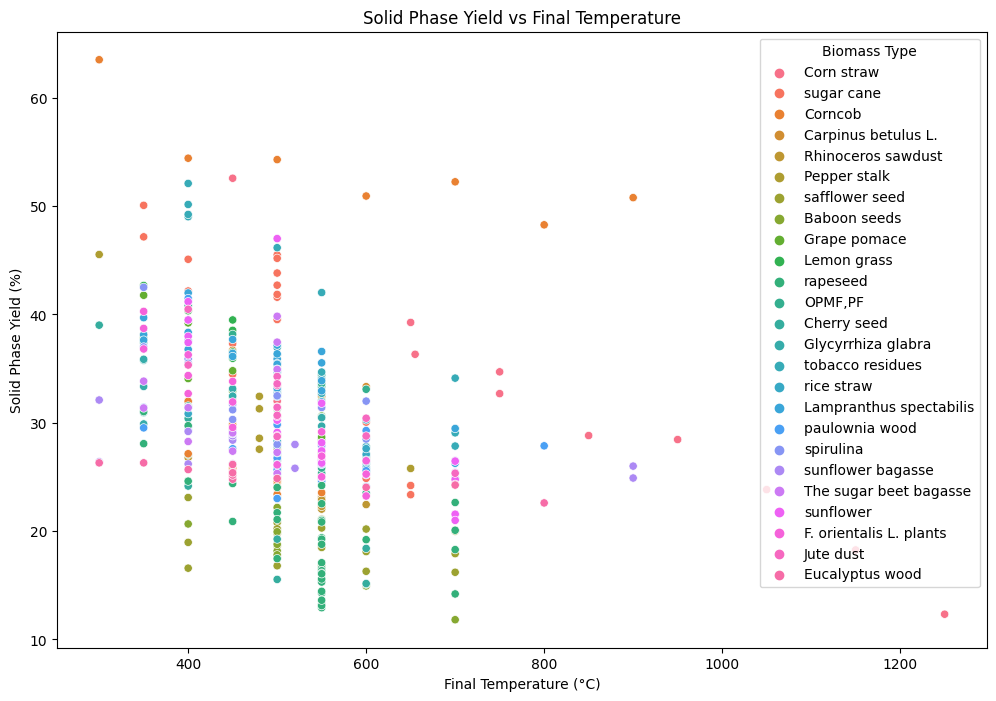

In [38]:
# Scatter plots to visualize the relationship between yields and final temperature
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FT', y='Solid phase', data=filtered_data, hue='Biomass species')
plt.title('Solid Phase Yield vs Final Temperature')
plt.xlabel('Final Temperature (°C)')
plt.ylabel('Solid Phase Yield (%)')
plt.legend(title='Biomass Type')
plt.show()

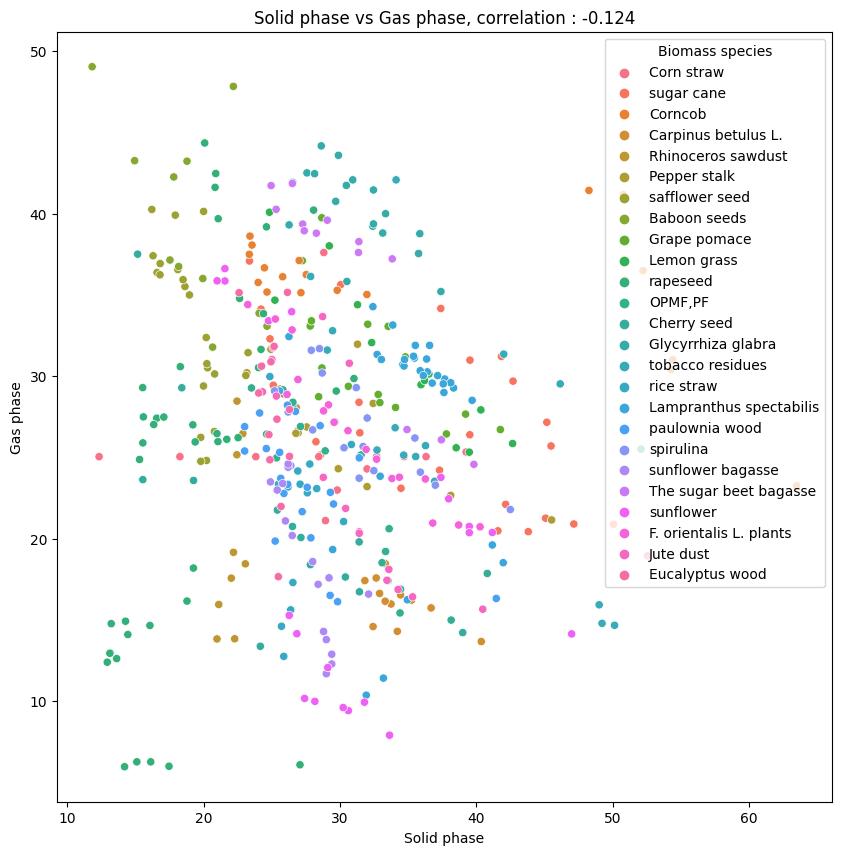

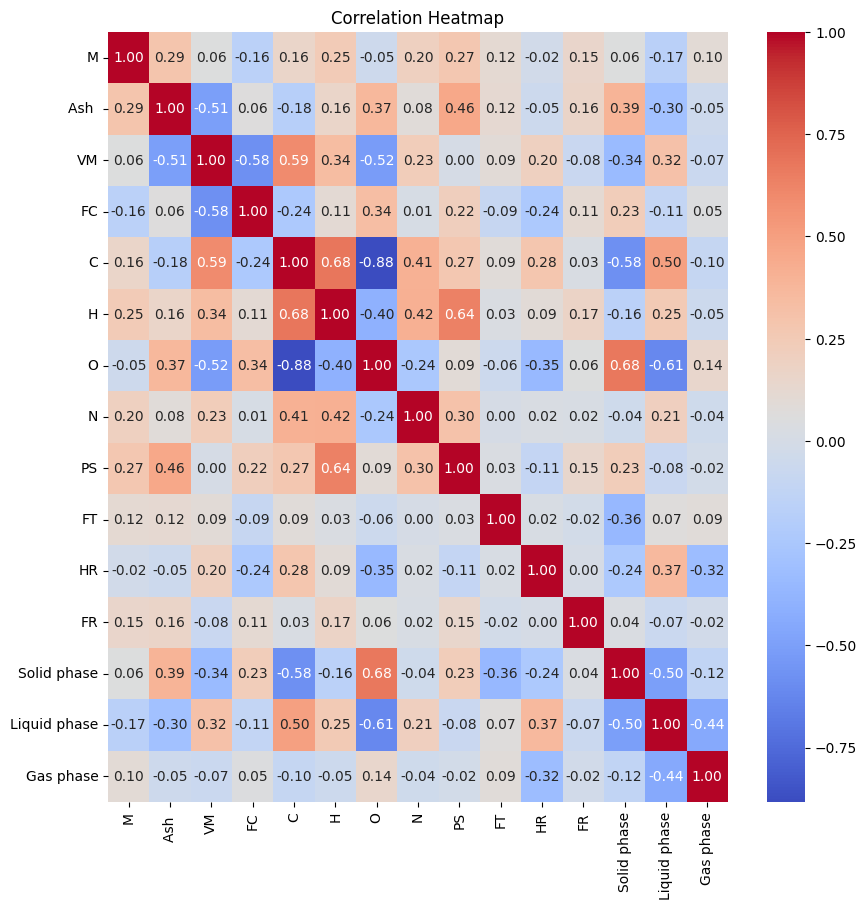

Dropdown(description='X-axis:', index=12, options=('M', 'Ash ', 'VM', 'FC', 'C', 'H', 'O', 'N', 'PS', 'FT', 'H…

Dropdown(description='Y-axis:', index=14, options=('M', 'Ash ', 'VM', 'FC', 'C', 'H', 'O', 'N', 'PS', 'FT', 'H…

SelectMultiple(description='Biomass species:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…

Output()

In [39]:
df = pd.DataFrame(filtered_data)

# Define dropdown widgets for selecting x, y, and hue fields
x_dropdown = widgets.Dropdown(
    options=[x for x in df.columns if x != 'Biomass species'],
    value='Solid phase',
    description='X-axis:',
)

y_dropdown = widgets.Dropdown(
    options=[x for x in df.columns if x != 'Biomass species'],
    value='Gas phase',
    description='Y-axis:',
)


# Define a multi-select widget for filtering by 'Biomass species'
biomass_select = widgets.SelectMultiple(
    options=df['Biomass species'].unique(),
    value=tuple(df['Biomass species'].unique().tolist()),  # Default selection
    description='Biomass species:',
    layout=widgets.Layout(width='300px',height="200px")
)

# Update function to filter data and plot the chart
def update_chart(x_axis, y_axis, biomass_filter):
    # Filter the data based on selected biomass species
    filtered_data = df[df['Biomass species'].isin(biomass_filter)]
    corr = filtered_data[numerical_features].corr()
    # Plot the scatterplot
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=x_axis, y=y_axis, data=filtered_data, hue='Biomass species')
    plt.title(f'{x_axis} vs {y_axis}, correlation : {round(corr.loc[x_axis,y_axis],3)}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend(title='Biomass species')
    plt.show()
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
#     Use interactive_output to link the widgets with the update function

# Use interactive_output to link the widgets with the update function
interactive_plot = interactive_output(update_chart, {
    'x_axis': x_dropdown, 
    'y_axis': y_dropdown, 

    'biomass_filter': biomass_select
})

# Display the widgets and the plot
display(x_dropdown, y_dropdown,  biomass_select, interactive_plot)